In [1]:
import numpy as np
import pandas as pd

import datetime
import math
import os

#Pre-processing
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

#Plots and graphs
from matplotlib import pyplot as plt
import seaborn as sns

#Model building
from sklearn.model_selection import train_test_split 

#%matplotlib notebook
%matplotlib inline

#Clustering specific libraries
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

#Cluster metrics
from sklearn import metrics

### Dataset Of 29 March

In [2]:
%pwd
%cd D:\NOTES\SEM 3\Mini Project

# reading a csv files


df29=pd.read_excel("CMC 29 march_final.xlsx")     

D:\NOTES\SEM 3\Mini Project


### Basic EDA

In [3]:
df29.shape

(4299, 9)

In [4]:
df29.head()

,Sr.No.,Name,Price,24h %,7d %,Market Cap,Volume(24h),Circulating Supply,Volume(24h)inMillion
0,1,Bitcoin\nBTC\n\n\n\nBuy,57829.7900,0.0300,0.0093,1079565727546,57450759754993446,18667987,5.745076e+10
1,2,Ethereum\nETH\n\n\n\nBuy,1828.9600,0.0705,0.024,210791481216,2241591216312256112,115252240,2.241591e+12
2,3,Binance Coin\nBNB\n\n\n\nBuy,273.3900,0.0170,0.0012,42247060651,21306876447793704,154532785,2.130688e+10
3,4,Tether\nUSDT,0.9994,0.0022,0.0027,40454668947,8049080754280536161810,40477463997,8.049081e+15
4,5,Cardano\nADA,1.2100,0.0151,0.0223,38647488299,25909360702141821654,31948309441,2.590936e+13


In [5]:
df29.tail()

,Sr.No.,Name,Price,24h %,7d %,Market Cap,Volume(24h),Circulating Supply,Volume(24h)inMillion
4294,4296,Mafia.Network\nMAFI,0.004762,0.0773,0.0252,na,0,0,0.0
4295,4297,Maki Finance\nMAKI,0.805700,0.0773,0.0252,na,0,0,0.0
4296,4298,Predix Network\nPRDX,0.402500,0.0762,0.0687,na,0,0,0.0
4297,4299,YEARN2.FINANCE\nYFI2,4.670000,0.0773,0.0061,na,0,0,0.0
4298,4300,Farm House Finance\nFHSE,8.880000,0.0773,0.0252,na,0,0,0.0


In [6]:
df29.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sr.No.                4299 non-null   int64  
 1   Name                  4299 non-null   object 
 2   Price                 4299 non-null   float64
 3   24h %                 4299 non-null   float64
 4   7d %                  4299 non-null   object 
 5   Market Cap            4299 non-null   object 
 6   Volume(24h)           4299 non-null   object 
 7   Circulating Supply    4299 non-null   int64  
 8   Volume(24h)inMillion  4299 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 302.4+ KB


In [7]:
df29.describe()

,Sr.No.,Price,24h %,Circulating Supply,Volume(24h)inMillion
count,4299.000000,4299.000000,4299.000000,4.299000e+03,4.299000e+03
mean,2150.837404,435.966321,0.414006,5.147420e+09,1.885882e+13
std,1241.394626,5318.392988,13.064584,1.546283e+11,1.033466e+15
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1076.500000,0.005605,0.024050,0.000000e+00,1.183271e+01
50%,2151.000000,0.084820,0.050900,8.553300e+05,3.828241e+04
75%,3225.500000,1.445000,0.114850,1.007251e+08,1.427350e+07
max,4300.000000,132809.950000,822.472600,9.862350e+12,6.724224e+16


### Replacing the na values in the dataset

In [8]:
df29=df29.replace("na", 0)

In [9]:
df29.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sr.No.                4299 non-null   int64  
 1   Name                  4299 non-null   object 
 2   Price                 4299 non-null   float64
 3   24h %                 4299 non-null   float64
 4   7d %                  4299 non-null   float64
 5   Market Cap            4299 non-null   int64  
 6   Volume(24h)           4299 non-null   object 
 7   Circulating Supply    4299 non-null   int64  
 8   Volume(24h)inMillion  4299 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 302.4+ KB


In [10]:
df29.dtypes

Sr.No.                    int64
Name                     object
Price                   float64
24h %                   float64
7d %                    float64
Market Cap                int64
Volume(24h)              object
Circulating Supply        int64
Volume(24h)inMillion    float64
dtype: object

### Preprocessing Part

first column atrribute is not playing any role so we will drop that column

In [11]:
df29=df29.drop('Sr.No.', axis=1) 

Also we have convereted "Volume(24h)" attribute into "Volume(24h)inMillion" in excel and dividing it by million to reduce the integer length 
so we will delete this column.

In [12]:
df29=df29.drop('Volume(24h)', axis=1) 
df29.head()

,Name,Price,24h %,7d %,Market Cap,Circulating Supply,Volume(24h)inMillion
0,Bitcoin\nBTC\n\n\n\nBuy,57829.7900,0.0300,0.0093,1079565727546,18667987,5.745076e+10
1,Ethereum\nETH\n\n\n\nBuy,1828.9600,0.0705,0.0240,210791481216,115252240,2.241591e+12
2,Binance Coin\nBNB\n\n\n\nBuy,273.3900,0.0170,0.0012,42247060651,154532785,2.130688e+10
3,Tether\nUSDT,0.9994,0.0022,0.0027,40454668947,40477463997,8.049081e+15
4,Cardano\nADA,1.2100,0.0151,0.0223,38647488299,31948309441,2.590936e+13


In [13]:
# To find out unique datapoints in dataset

df29.nunique()

Name                    4292
Price                   3639
24h %                   1890
7d %                    2593
Market Cap              2339
Circulating Supply      2286
Volume(24h)inMillion    3747
dtype: int64

In [14]:
# To find out duplicate datapoints in dataset

a=df29["Name"].duplicated()
df29[a]

,Name,Price,24h %,7d %,Market Cap,Circulating Supply,Volume(24h)inMillion
300,NewYork Exchange\nNYE,20.920000,0.0505,0.0069,148320884,7090060,1.964725e+05
1099,YOU COIN\nYOU,0.011630,0.0010,0.0612,6469108,556120198,7.589187e+07
1100,PotCoin\nPOT,0.028510,0.0093,0.1570,6438518,225970230,4.619162e+03
2599,wanLINK\nWANLINK,25.750000,0.0518,0.1804,0,0,1.109950e+05
2603,3x Long XRP Token\nXRPBULL,0.576900,0.0680,0.3027,0,0,1.075020e+07
3599,SPDR S&P 500 ETF tokenized stock Bittrex\nSPY,393.760000,0.0147,0.0005,0,0,3.402900e-02
4035,i9 Coin\nI9C,0.000578,0.0354,0.0144,0,0,5.400000e-04


In [15]:
df29['Name'].duplicated().sum()
df29.shape

(4299, 7)

In [16]:
df29=df29.drop_duplicates(subset ="Name",keep = 'first' , inplace = False)
df29.shape

(4292, 7)

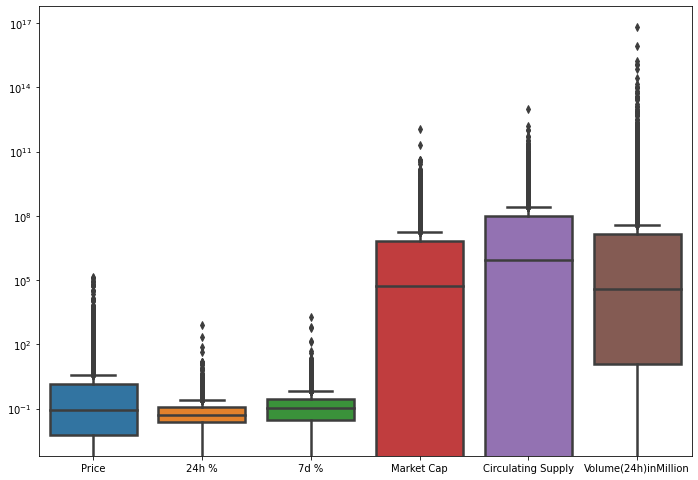

In [17]:
# To check outliers 
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df29,linewidth=2.5,ax=ax)
g.set_yscale("log")

In above plot we observe outliers in all the attributes, so we have to handle them first.

### Defining a userdefined function for Outliers with Interquartile Range (IQR)

In [18]:
def outlier(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

### Identifing Outliers

In [19]:
a = set()
for i in df29.drop("Name", axis = 1).columns:
    lower, higher = outlier(df29[i])
    l = df29.loc[(df29[i] < lower)| (df29[i] > higher)].index
    for j in list(l):
        a.add(j)

In [20]:
a

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [21]:
print('Identified outliers: %d' % len(a))

Identified outliers: 2524


There are 2524 outliers

### Removing Outliers

In [22]:
df29.shape

(4292, 7)

In [23]:
df29.drop(a,axis = 0, inplace = True)
df29.shape

(1768, 7)

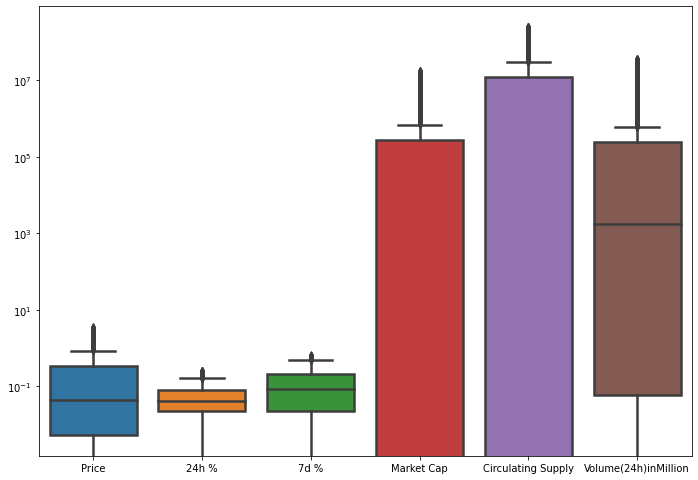

In [24]:
# check  after removal of outliers

import matplotlib.pyplot as plt


a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df29,linewidth=2.5,ax=ax)
g.set_yscale("log")

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'24h %'}>],
       [<AxesSubplot:title={'center':'7d %'}>,
        <AxesSubplot:title={'center':'Market Cap'}>],
       [<AxesSubplot:title={'center':'Circulating Supply'}>,
        <AxesSubplot:title={'center':'Volume(24h)inMillion'}>]],
      dtype=object)

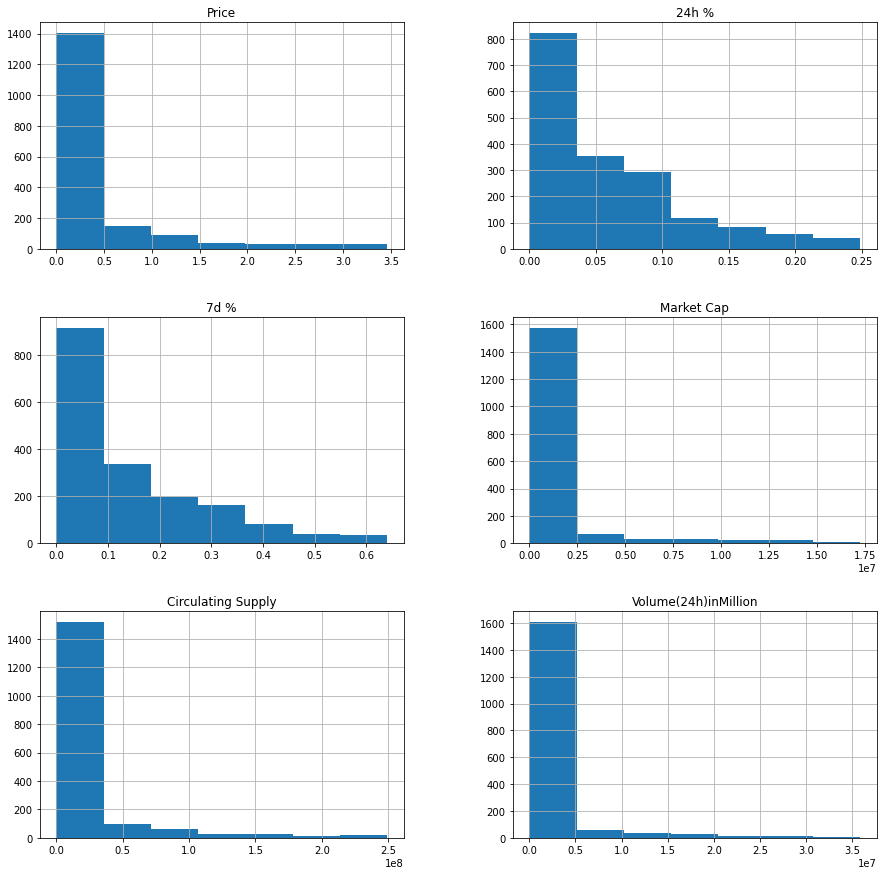

In [25]:
df29.hist(bins=7,figsize=(15,15))

In [26]:
df29.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Price,2.636579,6.791251
24h %,1.341988,1.322641
7d %,1.261936,0.929532
Market Cap,3.616928,13.374826
Circulating Supply,3.252735,11.246558
Volume(24h)inMillion,4.079525,17.670277


Fairly Symmetrical -0.5 to 0.5 Moderate Skewed -0.5 to -1.0 and 0.5 to 1.0 Highly Skewed < -1.0 and > 1.0

<AxesSubplot:>

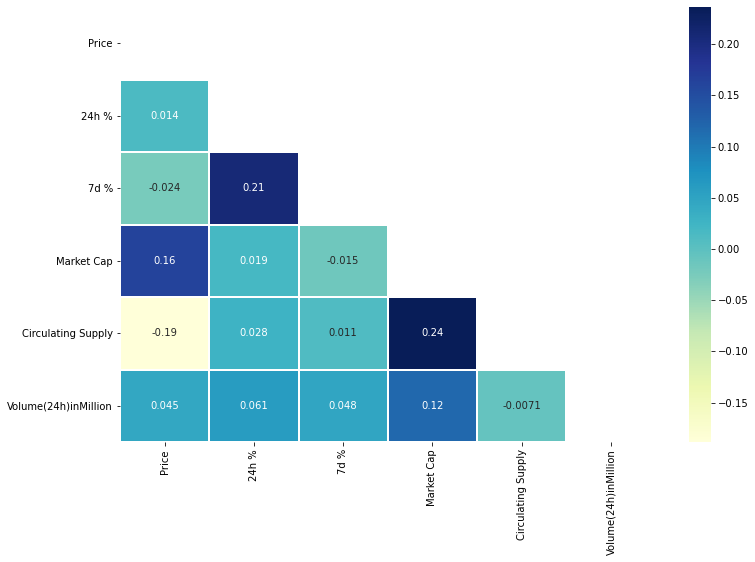

In [27]:
corr = df29.corr()
mask = np.triu(corr)
plt.figure(figsize=(12,8))
sns.heatmap(corr, mask=mask, cmap='YlGnBu', linewidths=1, annot=True)

In [28]:
df29.corr()

,Price,24h %,7d %,Market Cap,Circulating Supply,Volume(24h)inMillion
Price,1.000000,0.014257,-0.024264,0.164357,-0.188487,0.044650
24h %,0.014257,1.000000,0.209064,0.019080,0.028323,0.060545
7d %,-0.024264,0.209064,1.000000,-0.014510,0.010812,0.047767
Market Cap,0.164357,0.019080,-0.014510,1.000000,0.236127,0.118877
Circulating Supply,-0.188487,0.028323,0.010812,0.236127,1.000000,-0.007101
Volume(24h)inMillion,0.044650,0.060545,0.047767,0.118877,-0.007101,1.000000


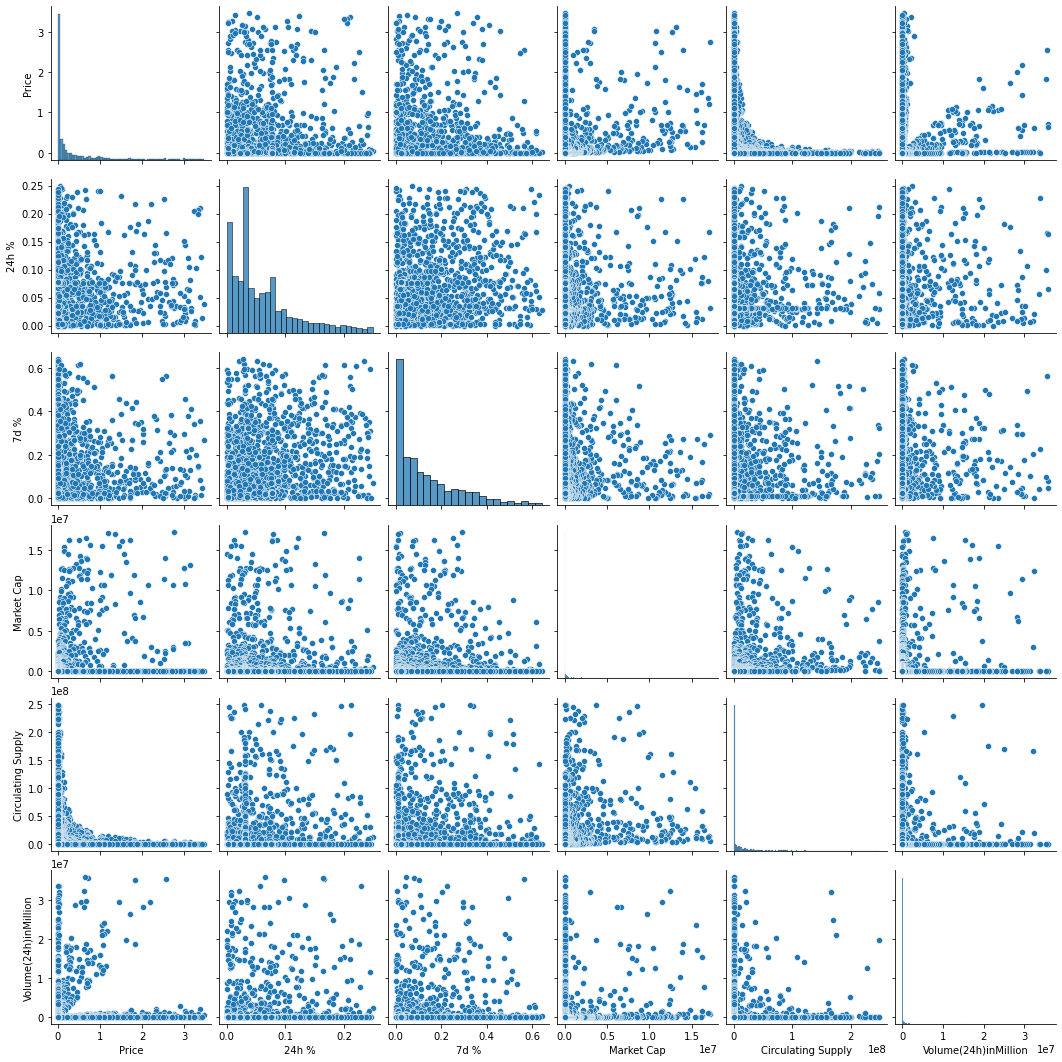

In [29]:
sns.pairplot(df29)

In [30]:
df29.head(5)

,Name,Price,24h %,7d %,Market Cap,Circulating Supply,Volume(24h)inMillion
819,APYSwap\nAPYS,2.7600,0.0315,0.2900,17235897,6252080,6.477172e+05
823,Dracula Token\nDRC,1.2000,0.1666,0.0196,17092955,14250719,1.081559e+06
825,Kira Network\nKEX,1.3500,0.0788,0.0115,16948582,12532083,9.115157e+05
830,Glitch\nGLCH,0.2733,0.0864,0.0109,16221489,59359301,1.538457e+07
831,Unido EP\nUDO,0.6769,0.1219,0.2507,16489005,24358790,7.603191e+06


In [31]:
df29.iloc[:, [0, 6]]

,Name,Volume(24h)inMillion
819,APYSwap\nAPYS,6.477172e+05
823,Dracula Token\nDRC,1.081559e+06
825,Kira Network\nKEX,9.115157e+05
830,Glitch\nGLCH,1.538457e+07
831,Unido EP\nUDO,7.603191e+06
...,...,...
4291,Enceladus Network\nENCX,0.000000e+00
4292,"YFIKING,FINANCE\nYFIKING",0.000000e+00
4294,Mafia.Network\nMAFI,0.000000e+00
4295,Maki Finance\nMAKI,0.000000e+00


### Extracting Independent Variables
Here we don't need any dependent variable as it is a clustering problem, So we will just add a line of code for the matrix of features.

#### 1.Kmean clustering of Price with Market Cap attributes

In [32]:
x = df29.iloc[:, [1, 4]].values 

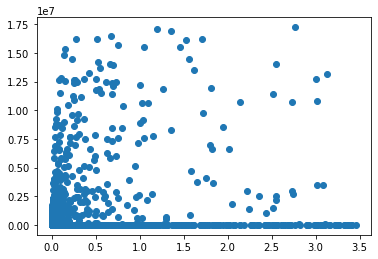

In [33]:
#plt.scatter(df29, x='Price', y='Market Cap')

u=df29['Price']
v=df29['Market Cap']
plt.scatter(u,v)

### Finding the optimal number of clusters using the elbow method

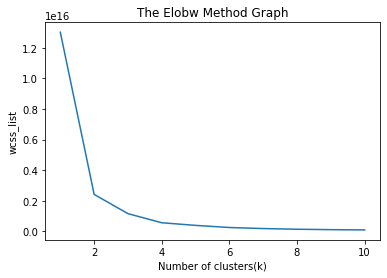

In [34]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

### Training the K-means algorithm on the training dataset

In [35]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict1= kmeans.fit_predict(x)  

### Visualizing the Clusters of Price with Market Cap attributes

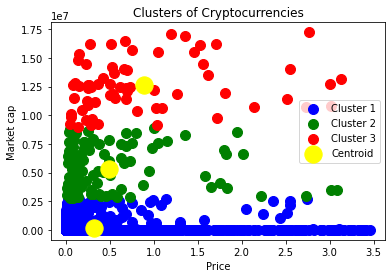

In [36]:
#visulaizing the clusters  
plt.scatter(x[y_predict1 == 0, 0], x[y_predict1 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict1 == 1, 0], x[y_predict1 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict1== 2, 0], x[y_predict1 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Cryptocurrencies')  
plt.xlabel('Price')  
plt.ylabel('Market cap')  
plt.legend()  
plt.show()  

Low Price and has dense market cap, high price scattered market cap

The output image is clearly showing the Three different clusters with different colors. The clusters are formed between two parameters of the dataset; Price and Market Cap.  

Cluster1 shows the Cryptocurrencies with low to high price and low market cap 
Cluster2 shows the Cryptocurrencies with low price and average market cap 
Cluster3 shows the Cryptocurrencies with low to medium price and high market cap 

### Additional Clustering-Agglomerative Hierarchical Clustering

#### Finding the optimal number of clusters using the Dendrogram

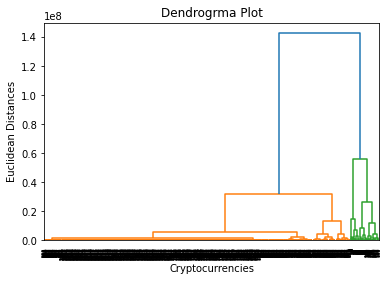

In [37]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Cryptocurrencies")  
plt.show()  

### Training the hierarchical clustering model

In [38]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_predict= hc.fit_predict(x)  

## Again using K-means algorithm on other Attributes for comparision

### 2.Kmean clustering of Price with volume(24h) attributes

In [39]:
x = df29.iloc[:, [1, 6]].values 

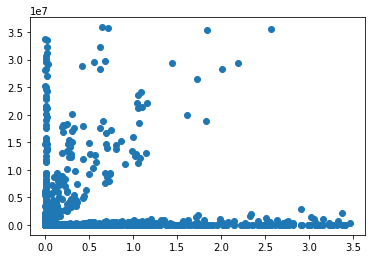

In [40]:
#plt.scatter(df29, x='Price', y='Volume(24h)inMillion')

u=df29['Price']
v=df29['Volume(24h)inMillion']
plt.scatter(u,v)

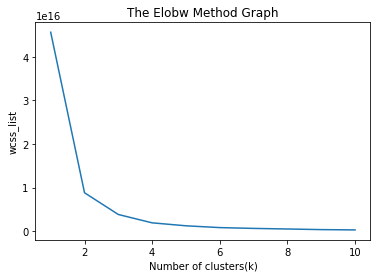

In [41]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [42]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict2= kmeans.fit_predict(x)  

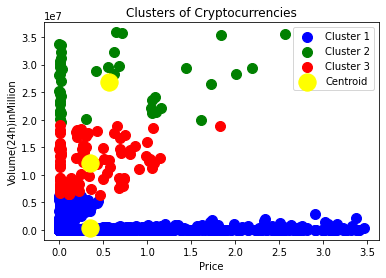

In [43]:
#visulaizing the clusters  
plt.scatter(x[y_predict2 == 0, 0], x[y_predict2 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict2 == 1, 0], x[y_predict2 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict2== 2, 0], x[y_predict2 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Cryptocurrencies')  
plt.xlabel('Price')  
plt.ylabel('Volume(24h)inMillion')  
plt.legend()  
plt.show()  

The output image is clearly showing the Three different clusters with different colors. The clusters are formed between two parameters of the dataset; Price and Volume(24h).  

Cluster1 shows the Cryptocurrencies with price(low to high) and low Volume(24h) 
Cluster2 shows the Cryptocurrencies with low price and average Volume(24h) 
Cluster3 shows the Cryptocurrencies with price(low to medium) and high Volume(24h) 

In [44]:
df29.head(2)

,Name,Price,24h %,7d %,Market Cap,Circulating Supply,Volume(24h)inMillion
819,APYSwap\nAPYS,2.76,0.0315,0.2900,17235897,6252080,6.477172e+05
823,Dracula Token\nDRC,1.20,0.1666,0.0196,17092955,14250719,1.081559e+06


## 3.Kmean clustering of Price with Circulating supply attributes

In [45]:
x = df29.iloc[:,[1,5]].values 

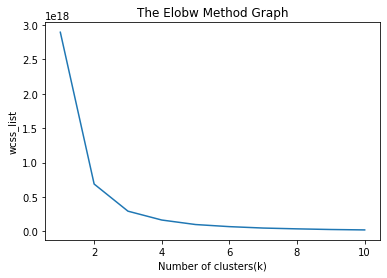

In [46]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [47]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict3= kmeans.fit_predict(x)  

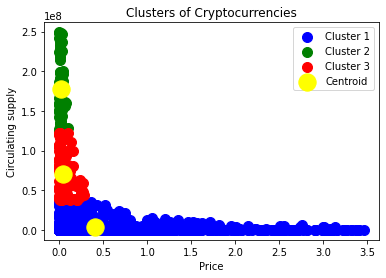

In [48]:
#visulaizing the clusters  
plt.scatter(x[y_predict3 == 0, 0], x[y_predict3 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict3 == 1, 0], x[y_predict3 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict3== 2, 0], x[y_predict3 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
# plt.scatter(x[y_predict3 == 3, 0], x[y_predict3 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Cryptocurrencies')  
plt.xlabel('Price')  
plt.ylabel('Circulating supply')  
plt.legend()  
plt.show()  

The output image is clearly showing the Three different clusters with different colors. The clusters are formed between two parameters of the dataset; Price and Circulating supply.

Cluster1 shows the Cryptocurrencies with price(low to high) and low Circulating supply  
Cluster2 shows the Cryptocurrencies with low price and average circulating supply 
Cluster3 shows the Cryptocurrencies with price(low to medium) and high Circulating supply 

In [49]:
df29.head(2)

,Name,Price,24h %,7d %,Market Cap,Circulating Supply,Volume(24h)inMillion
819,APYSwap\nAPYS,2.76,0.0315,0.2900,17235897,6252080,6.477172e+05
823,Dracula Token\nDRC,1.20,0.1666,0.0196,17092955,14250719,1.081559e+06


### 4.Kmean clustering of Price with 7d% supply attributes

In [50]:
x = df29.iloc[:,[1,3]].values 

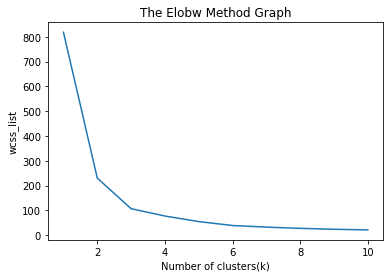

In [51]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [52]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict4= kmeans.fit_predict(x)  

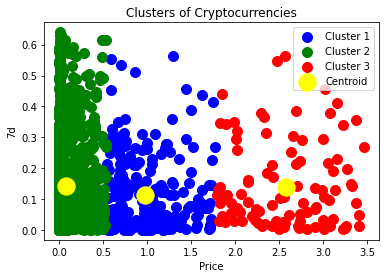

In [53]:
#visulaizing the clusters  
plt.scatter(x[y_predict4 == 0, 0], x[y_predict4 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict4 == 1, 0], x[y_predict4 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict4== 2, 0], x[y_predict4 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
# plt.scatter(x[y_predict4 == 3, 0], x[y_predict4 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Cryptocurrencies')  
plt.xlabel('Price')  
plt.ylabel('7d')  
plt.legend()  
plt.show()  

### 5.Kmean clustering of Price with 24h% attributes

In [54]:
x = df29.iloc[:,[1,2]].values 

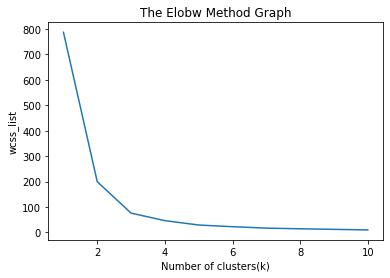

In [55]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [56]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict5= kmeans.fit_predict(x)  

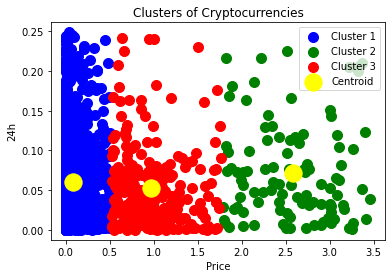

In [57]:
#visulaizing the clusters  
plt.scatter(x[y_predict5 == 0, 0], x[y_predict5 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict5 == 1, 0], x[y_predict5 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict5== 2, 0], x[y_predict5 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
# plt.scatter(x[y_predict4 == 3, 0], x[y_predict4 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Cryptocurrencies')  
plt.xlabel('Price')  
plt.ylabel('24h')  
plt.legend()  
plt.show()  

Observations:  
    
From Above clustering graphs we observe that   
Kmean clustering of attribute Price with Volume(24h) and  
Kmean clustering of attribute Price with Circulating supply 
gives us more insights.  

So we are considering two different senarios here of two set of parameters:   

Case -1:The clusters between two parameters Price and Volume(24h)  

The output image is clearly showing the Three different clusters with different colors. The clusters are formed between two parameters of the dataset; Price and Volume(24h).  

Cluster1 shows the Cryptocurrencies with price(low to high) and low Volume(24h) 
Cluster2 shows the Cryptocurrencies with low price and average Volume(24h) 
Cluster3 shows the Cryptocurrencies with price(low to medium) and high Volume(24h) 

Case -2:The clusters between two parameters Price and Circulating supply.  

The output image is clearly showing the Three different clusters with different colors. The clusters are formed between two parameters of the dataset; Price and Circulating supply.

Cluster1 shows the Cryptocurrencies with price(low to high) and low Circulating supply  
Cluster2 shows the Cryptocurrencies with low price and average circulating supply 
Cluster3 shows the Cryptocurrencies with price(low to medium) and high Circulating supply 

### We will compare our Clusters based on different attributes combination

In [58]:
y_predict2

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
y_predict3

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
y_predict1

array([2, 2, 2, ..., 0, 0, 0])

### Checking for volume and circulating Supply i.e if currencies lie in same cluster for volume and circulating supply

In [61]:
df29vc=pd.DataFrame({'Name':df29['Name'], 'cluster_vol24':y_predict2,'cluster_cirsupp':y_predict3})

In [62]:
df29vc.head(25)

,Name,cluster_vol24,cluster_cirsupp
819,APYSwap\nAPYS,0,0
823,Dracula Token\nDRC,0,0
825,Kira Network\nKEX,0,0
830,Glitch\nGLCH,2,2
831,Unido EP\nUDO,2,0
836,Kryll\nKRL,0,0
837,PolkaFoundry\nPKF,0,0
839,Atomic Wallet Coin\nAWC,0,0
849,Gleec\nGLEEC,2,0
853,USDJ\nUSDJ,1,0


In [63]:
##convertinf array into dataframe

df29vc=pd.DataFrame(df29vc, columns =['Name', 'cluster_vol24', 'cluster_cirsupp'])

In [64]:
df29vc['cluster_mismtc']=df29vc['cluster_vol24']!=df29vc['cluster_cirsupp']

In [65]:
df29vc.shape

(1768, 4)

In [66]:
df29vc

,Name,cluster_vol24,cluster_cirsupp,cluster_mismtc
819,APYSwap\nAPYS,0,0,False
823,Dracula Token\nDRC,0,0,False
825,Kira Network\nKEX,0,0,False
830,Glitch\nGLCH,2,2,False
831,Unido EP\nUDO,2,0,True
...,...,...,...,...
4291,Enceladus Network\nENCX,0,0,False
4292,"YFIKING,FINANCE\nYFIKING",0,0,False
4294,Mafia.Network\nMAFI,0,0,False
4295,Maki Finance\nMAKI,0,0,False


In [67]:
df29vc.head(10)

,Name,cluster_vol24,cluster_cirsupp,cluster_mismtc
819,APYSwap\nAPYS,0,0,False
823,Dracula Token\nDRC,0,0,False
825,Kira Network\nKEX,0,0,False
830,Glitch\nGLCH,2,2,False
831,Unido EP\nUDO,2,0,True
836,Kryll\nKRL,0,0,False
837,PolkaFoundry\nPKF,0,0,False
839,Atomic Wallet Coin\nAWC,0,0,False
849,Gleec\nGLEEC,2,0,True
853,USDJ\nUSDJ,1,0,True


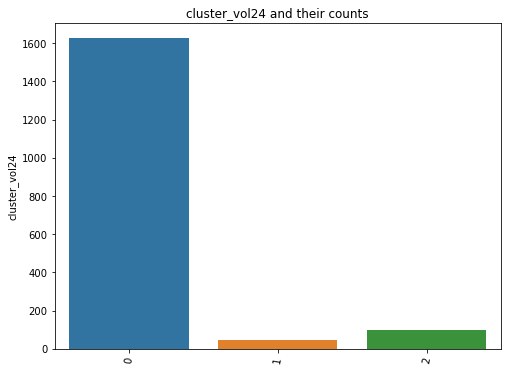

In [68]:
plt.figure(figsize=(8,6))
sns.barplot(x=df29vc.cluster_vol24.value_counts().index,y=df29vc.cluster_vol24.value_counts())
plt.xticks(rotation=80)
plt.title("cluster_vol24 and their counts")
plt.show()

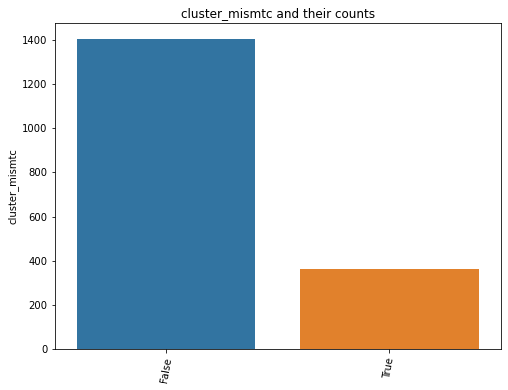

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(x=df29vc.cluster_mismtc.value_counts().index,y=df29vc.cluster_mismtc.value_counts())
plt.xticks(rotation=80)
plt.title("cluster_mismtc and their counts")
plt.show()

In [70]:
##Clusterwise count of currencies in  cluster_mktcp

x1=df29vc.cluster_vol24.value_counts()
x1

0    1626
2      98
1      44
Name: cluster_vol24, dtype: int64

In [71]:
##Clusterwise count of currencies 

x2=df29vc.cluster_cirsupp.value_counts()
x2

0    1523
2     174
1      71
Name: cluster_cirsupp, dtype: int64

In [72]:
x3=df29vc.cluster_mismtc.value_counts()
x3

False    1405
True      363
Name: cluster_mismtc, dtype: int64

In [73]:
df29vc.head()

,Name,cluster_vol24,cluster_cirsupp,cluster_mismtc
819,APYSwap\nAPYS,0,0,False
823,Dracula Token\nDRC,0,0,False
825,Kira Network\nKEX,0,0,False
830,Glitch\nGLCH,2,2,False
831,Unido EP\nUDO,2,0,True


In [74]:
df29vc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 819 to 4296
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             1768 non-null   object
 1   cluster_vol24    1768 non-null   int32 
 2   cluster_cirsupp  1768 non-null   int32 
 3   cluster_mismtc   1768 non-null   bool  
dtypes: bool(1), int32(2), object(1)
memory usage: 43.2+ KB


In [75]:
df292 = df29vc[df29vc.cluster_mismtc == True]

In [76]:
df292

,Name,cluster_vol24,cluster_cirsupp,cluster_mismtc
831,Unido EP\nUDO,2,0,True
849,Gleec\nGLEEC,2,0,True
853,USDJ\nUSDJ,1,0,True
856,eBoost\nEBST,0,2,True
863,SYNC Network\nSYNC,0,2,True
...,...,...,...,...
3118,Global Digital Content\nGDC,2,0,True
3268,PlayAndLike\nPAL,1,0,True
3287,Dogz\nDOGZ,1,0,True
3387,Globalvillage Ecosystem\nGVE,2,0,True


##### There are 363 currencies that does not lie in same cluster 

## Performing the same analysis on 9th May dataset of CoinmarketCap

In [80]:

df9=pd.read_excel("9thMayprojdata.xlsx")

In [81]:
df9.shape

(1768, 8)

In [82]:
df9.head()

,Name,Price,24h %,7d %,Market Cap,Volume(24h),Circulating Supply,Volume(24h)inmilion
0,Razor Network,0.2771,0.0211,0.1059,14696935,744452,53040334,0.744452
1,SOMESING,0.1016,0.0529,0.1655,14566033,1188051,143343000,1.188051
2,Yield Optimization Platform & Protocol,1.4400,0.0310,0.0050,14486281,1320057,10039116,1.320057
3,Oxbull.tech,1.9300,0.0570,0.6170,14443669,207903,7501504,0.207903
4,Kryll,0.4467,0.0211,0.0896,14132424,257017,31638781,0.257017


In [83]:
df9.tail()

,Name,Price,24h %,7d %,Market Cap,Volume(24h),Circulating Supply,Volume(24h)inmilion
1763,Naruto BSC,0.024600,0.0346,0.3746,0,240,0,0.000240
1764,PlayChip,0.001362,0.0217,0.2777,0,225,0,0.000225
1765,BTA Protocol,0.029190,0.0461,0.0567,0,240,0,0.000240
1766,YieldWars,0.060700,0.0558,0.0914,0,237,0,0.000237
1767,PeepCoin,0.000009,0.0074,0.4421,0,235,0,0.000235


In [84]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1768 non-null   object 
 1   Price                1768 non-null   float64
 2   24h %                1768 non-null   float64
 3   7d %                 1768 non-null   float64
 4   Market Cap           1768 non-null   int64  
 5   Volume(24h)          1768 non-null   int64  
 6   Circulating Supply   1768 non-null   int64  
 7   Volume(24h)inmilion  1768 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 110.6+ KB


In [85]:
df9.dtypes

Name                    object
Price                  float64
24h %                  float64
7d %                   float64
Market Cap               int64
Volume(24h)              int64
Circulating Supply       int64
Volume(24h)inmilion    float64
dtype: object

# 1.Kmean clustering of Price with Market Cap attributes

In [86]:
X = df9.iloc[:, [1, 4]].values 

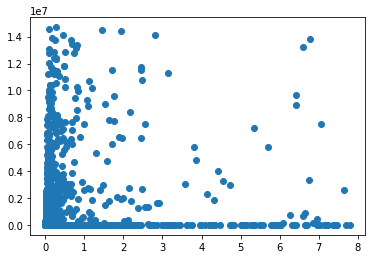

In [87]:
#plt.scatter(df29, x='Price', y='Market Cap')

u=df9['Price']
v=df9['Market Cap']
plt.scatter(u,v)

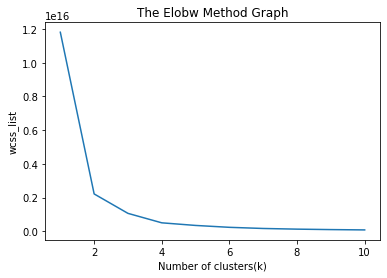

In [88]:
# Finding the optimal number of clusters using the elbow method

#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [89]:
# Training the K-means algorithm on the training dataset

#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_pred1= kmeans.fit_predict(X)  

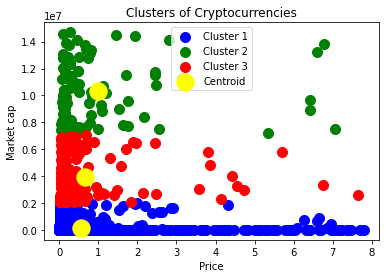

In [90]:
# Visualizing the Clusters of Price with Market Cap attributes

#visulaizing the clusters  
plt.scatter(X[y_pred1 == 0, 0], X[y_pred1 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y_pred1 == 1, 0], X[y_pred1 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X[y_pred1== 2, 0], X[y_pred1 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Cryptocurrencies')  
plt.xlabel('Price')  
plt.ylabel('Market cap')  
plt.legend()  
plt.show()  

Low Price and has dense market cap, high price scattered market cap

The output image is clearly showing the Three different clusters with different colors. The clusters are formed between two parameters of the dataset; Price and Market Cap.  

Cluster1 shows the Cryptocurrencies with low price and low market cap 
Cluster2 shows the Cryptocurrencies withaverage price and average market cap 
Cluster3 shows the Cryptocurrencies with high price and high market cap

## Agglomerative Hierarchical Clustering

#### Finding the optimal number of clusters using the Dendrogram


In [ ]:

#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(X, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Cryptocurrencies")  
plt.show()  

In [92]:
# Training the hierarchical clustering model

#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc1= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_predicthc= hc1.fit_predict(X)  

## K-means algorithm on other Attributes for comparision

### 2.Kmean clustering of Price with volume(24h) attributes

In [94]:
X = df9.iloc[:, [1, 6]].values 

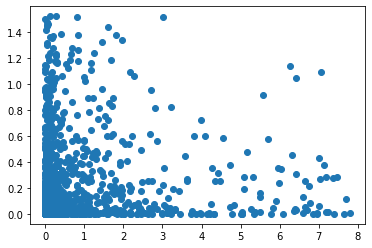

In [95]:
#plt.scatter(df29, x='Price', y='Volume(24h)inMillion')

u=df9['Price']
v=df9['Volume(24h)inmilion']
plt.scatter(u,v)

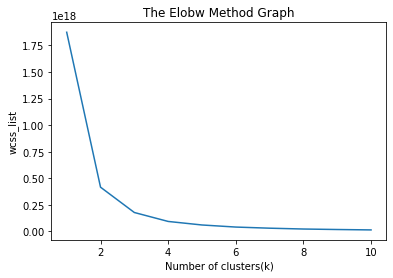

In [96]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [97]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_pred2= kmeans.fit_predict(X)  

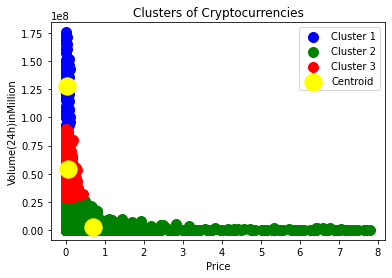

In [98]:
#visulaizing the clusters  
plt.scatter(X[y_pred2 == 0, 0], X[y_pred2 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y_pred2 == 1, 0], X[y_pred2 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X[y_pred2== 2, 0], X[y_pred2 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Cryptocurrencies')  
plt.xlabel('Price')  
plt.ylabel('Volume(24h)inMillion')  
plt.legend()  
plt.show()  

The output image is clearly showing the Three different clusters with different colors. The clusters are formed between two parameters of the dataset; Price and Volume(24h).  

Cluster1 shows the Cryptocurrencies with price(low to high) and low Volume(24h) 
Cluster2 shows the Cryptocurrencies with low price and average Volume(24h) 
Cluster3 shows the Cryptocurrencies with price(low to medium) and high Volume(24h)

In [99]:
df9.head(2)

,Name,Price,24h %,7d %,Market Cap,Volume(24h),Circulating Supply,Volume(24h)inmilion
0,Razor Network,0.2771,0.0211,0.1059,14696935,744452,53040334,0.744452
1,SOMESING,0.1016,0.0529,0.1655,14566033,1188051,143343000,1.188051


### 3.Kmean clustering of Price with Circulating supply attributes

In [100]:
X = df9.iloc[:,[1,5]].values 

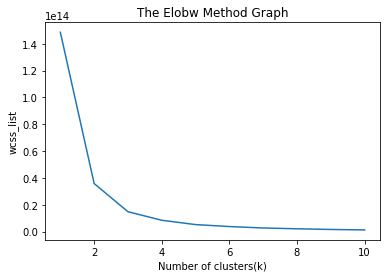

In [101]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [102]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_pred3= kmeans.fit_predict(X)  

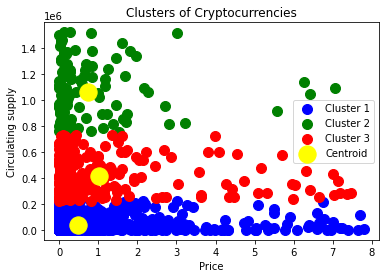

In [103]:
#visulaizing the clusters  
plt.scatter(X[y_pred3 == 0, 0], X[y_pred3 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y_pred3 == 1, 0], X[y_pred3 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X[y_pred3== 2, 0], X[y_pred3 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
# plt.scatter(x[y_predict3 == 3, 0], x[y_predict3 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Cryptocurrencies')  
plt.xlabel('Price')  
plt.ylabel('Circulating supply')  
plt.legend()  
plt.show()  

The output image is clearly showing the Three different clusters with different colors. The clusters are formed between two parameters of the dataset; Price and Circulating supply.

Cluster1 shows the Cryptocurrencies with price(low to high) and low Circulating supply 
Cluster2 shows the Cryptocurrencies with low price and average circulating supply 
Cluster3 shows the Cryptocurrencies with price(low) and high Circulating supply

In [104]:
df9.head(2)

,Name,Price,24h %,7d %,Market Cap,Volume(24h),Circulating Supply,Volume(24h)inmilion
0,Razor Network,0.2771,0.0211,0.1059,14696935,744452,53040334,0.744452
1,SOMESING,0.1016,0.0529,0.1655,14566033,1188051,143343000,1.188051


### 4.Kmean clustering of Price with 7d% supply attributes

In [105]:


x = df29.iloc[:,[1,3]].values 

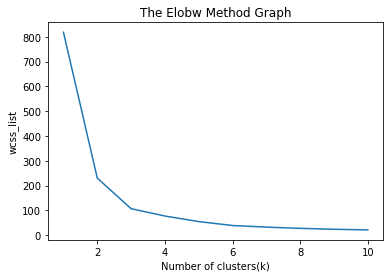

In [106]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [107]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict4= kmeans.fit_predict(x)  

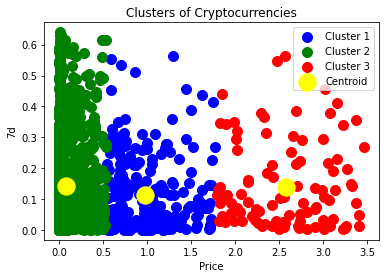

In [108]:
#visulaizing the clusters  
plt.scatter(x[y_predict4 == 0, 0], x[y_predict4 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict4 == 1, 0], x[y_predict4 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict4== 2, 0], x[y_predict4 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
# plt.scatter(x[y_predict4 == 3, 0], x[y_predict4 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Cryptocurrencies')  
plt.xlabel('Price')  
plt.ylabel('7d')  
plt.legend()  
plt.show()  

### 5.Kmean clustering of Price with 24h% attributes

In [109]:


X = df29.iloc[:,[1,2]].values 

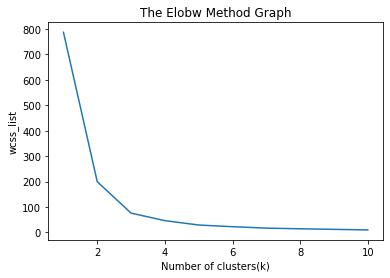

In [110]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [111]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict5= kmeans.fit_predict(X)  

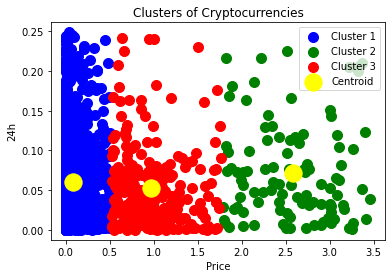

In [112]:
#visulaizing the clusters  
plt.scatter(X[y_predict5 == 0, 0], X[y_predict5 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y_predict5 == 1, 0], X[y_predict5 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X[y_predict5== 2, 0], X[y_predict5 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
# plt.scatter(x[y_predict4 == 3, 0], x[y_predict4 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Cryptocurrencies')  
plt.xlabel('Price')  
plt.ylabel('24h')  
plt.legend()  
plt.show()  

Observations:  
    
From Above clustering graphs we observe that   
Kmean clustering of attribute Price with Volume(24h) and  
Kmean clustering of attribute Price with Circulating supply 
gives us more insights.  

So we are considering two different senarios here of two set of parameters:   

Case -1:The clusters between two parameters Price and Volume(24h)  

Cluster1 shows the Cryptocurrencies with price(low to high) and low Volume(24h) 
Cluster2 shows the Cryptocurrencies with low price and average Volume(24h) 
Cluster3 shows the Cryptocurrencies with price(low to medium) and high Volume(24h) 

Case -2:The clusters between two parameters Price and Circulating supply.  

Cluster1 shows the Cryptocurrencies with price(low to high) and low Circulating supply
Cluster2 shows the Cryptocurrencies with low price and average Circulating supply 
Cluster3 shows the Cryptocurrencies with price(low to medium) and high Circulating supply 

####  Finally Comparing The Clusters of 2 different dataset of day 29th March and 9th May for actual analysis

In [113]:
y_pred2.shape

(1768,)

In [114]:
y_predict2.shape

(1768,)

In [115]:
y_predict3

array([0, 0, 0, ..., 0, 0, 0])

## Checking if Volume has increased or decrease or remained same for various currencies 


In [143]:

dft=pd.DataFrame({'Name':df29['Name'], 'cluster_29vol24':y_predict2,'cluster_9vol24':y_pred2})

In [117]:
dft.head(50)

,Name,cluster_29vol24,cluster_9vol24
819,APYSwap\nAPYS,0,2
823,Dracula Token\nDRC,0,0
825,Kira Network\nKEX,0,1
830,Glitch\nGLCH,2,1
831,Unido EP\nUDO,2,2
836,Kryll\nKRL,0,1
837,PolkaFoundry\nPKF,0,2
839,Atomic Wallet Coin\nAWC,0,1
849,Gleec\nGLEEC,2,1
853,USDJ\nUSDJ,1,2


In [118]:
dft['cluster_mismtc']=dft['cluster_29vol24']!=dft['cluster_9vol24']

In [119]:
df2 = dft[dft.cluster_mismtc == True]

In [120]:
df2

,Name,cluster_29vol24,cluster_9vol24,cluster_mismtc
819,APYSwap\nAPYS,0,2,True
825,Kira Network\nKEX,0,1,True
830,Glitch\nGLCH,2,1,True
836,Kryll\nKRL,0,1,True
837,PolkaFoundry\nPKF,0,2,True
...,...,...,...,...
4291,Enceladus Network\nENCX,0,1,True
4292,"YFIKING,FINANCE\nYFIKING",0,1,True
4294,Mafia.Network\nMAFI,0,1,True
4295,Maki Finance\nMAKI,0,1,True


### The currencies that have decreased from average volume to Low volume

In [121]:
df4 = df2[(df2.cluster_29vol24 == 1) & (df2.cluster_9vol24 == 0)]
df4


,Name,cluster_29vol24,cluster_9vol24,cluster_mismtc
1720,GoNetwork\nGOT,1,0,True
2475,Wise\nWISE,1,0,True
2517,Tessla Coin\nTSLA,1,0,True


In [122]:
df4 = df2[(df2.cluster_29vol24 ==0) & (df2.cluster_9vol24 == 1)]
df4

,Name,cluster_29vol24,cluster_9vol24,cluster_mismtc
825,Kira Network\nKEX,0,1,True
836,Kryll\nKRL,0,1,True
839,Atomic Wallet Coin\nAWC,0,1,True
854,Zano\nZANO,0,1,True
856,eBoost\nEBST,0,1,True
...,...,...,...,...
4291,Enceladus Network\nENCX,0,1,True
4292,"YFIKING,FINANCE\nYFIKING",0,1,True
4294,Mafia.Network\nMAFI,0,1,True
4295,Maki Finance\nMAKI,0,1,True


In [123]:
df4 = df2[(df2.cluster_29vol24 ==0) & (df2.cluster_9vol24 == 2)]
df4

,Name,cluster_29vol24,cluster_9vol24,cluster_mismtc
819,APYSwap\nAPYS,0,2,True
837,PolkaFoundry\nPKF,0,2,True
884,Geeq\nGEEQ,0,2,True
888,CONTRACOIN\nCTCN,0,2,True
891,BitcoinPoS\nBPS,0,2,True
...,...,...,...,...
2307,Bulleon\nBUL,0,2,True
2308,BriaCoin\nBRIA,0,2,True
2310,Dash Green\nDASHG,0,2,True
2323,KZ Cash\nKZC,0,2,True


## Checking if Circulating supply has increased or decrease or remained same for various currencies 


In [142]:
y_predict1.shape

(1768,)

In [131]:
y_pred1.shape

(1768,)

In [132]:
dft2=pd.DataFrame({'Name':df9['Name'], '29cluster_cs':y_predict1,'9cluster_cs':y_pred1})

In [133]:
dft2.head(50)

,Name,29cluster_cs,9cluster_cs
0,Razor Network,2,1
1,SOMESING,2,1
2,Yield Optimization Platform & Protocol,2,1
3,Oxbull.tech,2,1
4,Kryll,2,1
5,PLATINCOIN,2,1
6,SynchroBitcoin,2,1
7,CafeSwap Token,2,1
8,Ixcoin,2,1
9,Fuse Network,2,1


In [134]:
### Comparison

In [135]:
dft=pd.DataFrame({'Name':df29['Name'], 'cluster_29_cs':y_predict3,'cluster_9_cs':y_pred3})

In [136]:
dft['cluster_mismtc']=dft['cluster_29_cs']!=dft['cluster_9_cs']

In [137]:
df3 = dft[dft.cluster_mismtc == True]

In [138]:
df3

,Name,cluster_29_cs,cluster_9_cs,cluster_mismtc
819,APYSwap\nAPYS,0,1,True
823,Dracula Token\nDRC,0,1,True
825,Kira Network\nKEX,0,1,True
830,Glitch\nGLCH,2,0,True
831,Unido EP\nUDO,0,2,True
...,...,...,...,...
3159,ThingsOperatingSystem\nTOS,0,2,True
3160,ASI.finance\nBASI,0,2,True
3161,FOX Token\nFOX,0,2,True
3165,OneSwap DAO Token\nONES,0,2,True


In [139]:
df4 = df3[(df3.cluster_29_cs == 1) & (df3.cluster_9_cs == 0)]
df4

,Name,cluster_29_cs,cluster_9_cs,cluster_mismtc
906,Aryacoin\nAYA,1,0,True
976,Hakka.Finance\nHAKKA,1,0,True
981,Casino Betting Coin\nCBC,1,0,True
1010,Insights Network\nINSTAR,1,0,True
1043,Feathercoin\nFTC,1,0,True
...,...,...,...,...
2175,The Currency Analytics\nTCAT,1,0,True
2195,Carebit\nCARE,1,0,True
2202,Apollon\nXAP,1,0,True
2233,Guider\nGDR,1,0,True


In [140]:
df4 = df3[(df3.cluster_29_cs == 0) & (df3.cluster_9_cs == 1)]
df4

,Name,cluster_29_cs,cluster_9_cs,cluster_mismtc
819,APYSwap\nAPYS,0,1,True
823,Dracula Token\nDRC,0,1,True
825,Kira Network\nKEX,0,1,True
836,Kryll\nKRL,0,1,True
870,Azuki\nAZUKI,0,1,True
...,...,...,...,...
2787,BiLira\nTRYB,0,1,True
2789,PRCY Coin\nPRCY,0,1,True
2790,RamenSwap\nRAMEN,0,1,True
2794,Treecle\nTRCL,0,1,True


In [141]:
df4 = df3[(df3.cluster_29_cs == 0) & (df3.cluster_9_cs == 2)]
df4

,Name,cluster_29_cs,cluster_9_cs,cluster_mismtc
831,Unido EP\nUDO,0,2,True
853,USDJ\nUSDJ,0,2,True
854,Zano\nZANO,0,2,True
873,Peercoin\nPPC,0,2,True
875,Insured Finance\nINFI,0,2,True
...,...,...,...,...
3159,ThingsOperatingSystem\nTOS,0,2,True
3160,ASI.finance\nBASI,0,2,True
3161,FOX Token\nFOX,0,2,True
3165,OneSwap DAO Token\nONES,0,2,True
